# Post Assignment Data processing

**Car sharing platform in Austria **

**Payyappilly Tomy Vinu**

### Loading CSV from a URL

We are going to use  CSV file from a Web loaction.

We load the Car sharing platform data for  Austria  in 2023, located [https://www.mobil-am-land.at/content/Open_Data](https://www.mobil-am-land.at/content/Open_Data).

In [106]:
import csv
import codecs
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
# loading a "CSV" file from mobil-am-land.at



#url , from mobil-am-land.at
url = 'https://www.mobil-am-land.at/w/index.php?title=Spezial:Ask&x=-5B-5BBundesland%3A%3A%2B-5D-5D-20-5B-5BKategorie%3ACarSharing-2DSystem-5D-5D-20-5B-5BAktiv%3A%3Awahr-5D-5D%2F-3F%3DNAME%2F-3FCarSharing-2DTyp%3DCARSHARING-2DTYP%2F-3FHomepage%3DHOMEPAGE%2F-3FBundesland%3DBUNDESLAND%2F-3FOrt%3DGEMEINDEN%2F-3FCarSharing-2DSoftware%3DSOFTWARE%2F-3FLetzterCheck-23ISO%3DZULETZT-20%C3%9CBERPR%C3%9CFT&mainlabel=-&limit=1000&offset=0&format=csv&searchlabel=%3Cspan%20class%3D%22btn%20btn-primary%22%3E%3Ci%20class%3D%22fa%20fa-download%22%3E%3C%2Fi%3E%20Download%20als%20CSV-Datei%3C%2Fspan%3E&filename=carsharing_oesterreich_20231105.csv'

**Load csv from Mobil land austria site using panda library Data frame**

In [108]:
car_sharing_url = url
car_sharing = pd.read_csv(car_sharing_url)

In [109]:
car_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               116 non-null    object
 1   CARSHARING-TYP     115 non-null    object
 2   HOMEPAGE           108 non-null    object
 3   BUNDESLAND         116 non-null    object
 4   GEMEINDEN          115 non-null    object
 5   SOFTWARE           80 non-null     object
 6   ZULETZT ÜBERPRÜFT  79 non-null     object
dtypes: object(7)
memory usage: 6.5+ KB


In [110]:
car_sharing.head()

,NAME,CARSHARING-TYP,HOMEPAGE,BUNDESLAND,GEMEINDEN,SOFTWARE,ZULETZT ÜBERPRÜFT
0,Bea - Badener eCar Sharing,Verein,https://www.drive-bea.at/,Niederösterreich,Baden,Zemtu,2017-02-01
1,Beecar,kommerziell/fixe Standplätze,https://beecar.at/,Tirol,"Kössen,Kufstein,Niederndorf,Schwoich,Thiersee",Zemtu,2020-06-02
2,Buddy Carsharing,kommerziell/fixe Standplätze,https://www.buddy-carsharing.at/,Niederösterreich,"Krems an der Donau,Langenlois,Tulln an der Donau",NaN,2019-02-04
3,BÄM Ö-Car-Sharing,kommerziell/fixe Standplätze,http://www.bäm.at/,Salzburg,"Bischofshofen,Sankt Johann im Pongau",Zemtu,2020-07-10
4,Car Sharing Großgmain,Verein,https://car-sharing-grossgmain.business.site/,Salzburg,Großgmain,Zemtu,2021-09-10


Total Rows 116 , 
*out of which one car sharing type column and Gemeinden column is null* , 

which we can fix by directly selecting the record index and providing Values

Find Gemeinden null values

In [111]:
null_rows =car_sharing.loc[car_sharing['GEMEINDEN'].isnull()]

print(null_rows)

         NAME       CARSHARING-TYP                    HOMEPAGE  \
77  Getaround  Peer2Peer-Plattform  https://www.getaround.com/   

                                           BUNDESLAND GEMEINDEN SOFTWARE  \
77  Wien,Niederösterreich,Oberösterreich,Vorarlber...       NaN      NaN   

   ZULETZT ÜBERPRÜFT  
77        2020-01-25  


**Give empty Gemeinden Value as Wien**

In [112]:
car_sharing["GEMEINDEN"].fillna("Wien", inplace = True)

**Find empty records for car sharing type column**

In [113]:
null_rows = car_sharing.loc[car_sharing['CARSHARING-TYP'].isnull()]

print(null_rows)

                   NAME CARSHARING-TYP  \
103  Speedee Hafnerbach            NaN   

                                         HOMEPAGE        BUNDESLAND  \
103  http://www.energiegruppe-hafnerbach.at/move/  Niederösterreich   

      GEMEINDEN SOFTWARE ZULETZT ÜBERPRÜFT  
103  Hafnerbach   Ibiola        2020-02-14  


**Give empty Car sharing type column value as Verein**

In [114]:
car_sharing["CARSHARING-TYP"].fillna("Verein", inplace = True)

In [115]:
car_sharing['BUNDESLAND'] = car_sharing['BUNDESLAND'].str.lower()
car_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               116 non-null    object
 1   CARSHARING-TYP     116 non-null    object
 2   HOMEPAGE           108 non-null    object
 3   BUNDESLAND         116 non-null    object
 4   GEMEINDEN          116 non-null    object
 5   SOFTWARE           80 non-null     object
 6   ZULETZT ÜBERPRÜFT  79 non-null     object
dtypes: object(7)
memory usage: 6.5+ KB


**Key columns like, Name, Platform type, BundesLand, Gemende is now filled and corrected**

*find the car sharing offering in **Tyrol** land*

In [116]:
car_sharing_tyrol = car_sharing.query('BUNDESLAND == "tirol"').copy()
car_sharing_tyrol.head(30)

,NAME,CARSHARING-TYP,HOMEPAGE,BUNDESLAND,GEMEINDEN,SOFTWARE,ZULETZT ÜBERPRÜFT
1,Beecar,kommerziell/fixe Standplätze,https://beecar.at/,tirol,"Kössen,Kufstein,Niederndorf,Schwoich,Thiersee",Zemtu,2020-06-02
10,Carsharing Jo-e,Verein,https://www.treffpunkt-stjohann.at/jo-e/,tirol,St. Johann in Tirol,Ibiola,NaN
15,Carsharing Pillerseetal,Verein,https://www.regio-tech.at/page.cfm?vpath=proje...,tirol,Fieberbrunn,NaN,2022-01-04
23,E-Car-Sharing der Raiffeisenbank Wipptal,kommerziell/fixe Standplätze,http://www.raiffeisen.at/wipptalbanken/NA-1209...,tirol,Steinach am Brenner,NaN,2017-01-22
51,E-Go Prutz,Verein,https://www.prutz.tirol.gv.at/eCarsharing,tirol,Prutz,Zemtu,2022-02-21
71,Ferni Carsharing,kommerziell/fixe Standplätze,https://www.ferni.at/,tirol,"Reutte,Lechaschau,Bach,Pflach",NaN,2023-07-17
86,Mobi – Carsharing Angerberg,Verein,https://www.angerberg.at/Buergerservice/Dienst...,tirol,Angerberg,NaN,2023-06-06
111,WE MOVE NOW,kommerziell/fixe Standplätze,https://www.wemovenow.com/mobilityhub/,tirol,"Innsbruck,Axams",NaN,2020-09-09


***Sort the data set with CARSHARING-TYP***

In [117]:
car_sharing = car_sharing.sort_values(by=['CARSHARING-TYP'])
car_sharing.head(40)

,NAME,CARSHARING-TYP,HOMEPAGE,BUNDESLAND,GEMEINDEN,SOFTWARE,ZULETZT ÜBERPRÜFT
77,Getaround,Peer2Peer-Plattform,https://www.getaround.com/,"wien,niederösterreich,oberösterreich,vorarlber...",Wien,NaN,2020-01-25
0,Bea - Badener eCar Sharing,Verein,https://www.drive-bea.at/,niederösterreich,Baden,Zemtu,2017-02-01
79,KomCars,Verein,https://www.komcars.at/,niederösterreich,Gumpoldskirchen,Zemtu,2020-07-07
76,Gaubitscher Stromgleiter,Verein,http://www.gaubitsch.at/system/web/news.aspx?m...,niederösterreich,Gaubitsch,Zemtu,2017-02-01
75,Garser Ecomobil,Verein,https://www.gars.at/jart/prj3/gars/main.jart?r...,niederösterreich,Gars am Kamp,Zemtu,2020-07-07
74,Frohni - E-Carsharing Frohnleiten,Verein,https://www.frohnleiten.com/elektroauto/,steiermark,Frohnleiten,Miete dein Auto,2023-06-13
73,Freiraum Gneis Mobil,Verein,http://www.freiraum-gneis-mobil.at/,salzburg,Salzburg,NaN,NaN
70,Fahrvergnügen.at,Verein,http://www.fahrvergnügen.at,"niederösterreich,wien","Tulln an der Donau,St. Andrä-Wördern,Absdorf",Family of Power,2021-03-03
69,FRED E-Carsharing,Verein,http://www.fred-fahren.at/,kärnten,"Hermagor-Pressegger See,Kötschach-Mauthen",Ibiola,NaN
66,Ever-Green E-Carsharing,Verein,https://www.ever-green.at/,steiermark,"Graz,Passail,Weiz",Family of Power,2020-07-30


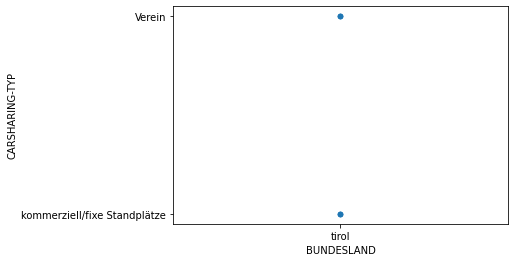

In [118]:
car_sharing_tyrol.plot(kind = 'scatter', x = 'BUNDESLAND', y = 'CARSHARING-TYP')
plt.show()

***convert dataset to Json Type***

In [119]:
json_out_records = car_sharing.to_json(orient = 'records')
json_out


'[{"NAME":"Getaround","CARSHARING-TYP":"Peer2Peer-Plattform","HOMEPAGE":"https:\\/\\/www.getaround.com\\/","BUNDESLAND":"wien,nieder\\u00f6sterreich,ober\\u00f6sterreich,vorarlberg,steiermark,burgenland,tirol,k\\u00e4rnten,salzburg","GEMEINDEN":"Wien","SOFTWARE":null,"ZULETZT \\u00dcBERPR\\u00dcFT":"2020-01-25"},{"NAME":"E-Otti","CARSHARING-TYP":"Verein","HOMEPAGE":"http:\\/\\/www.ottenschlag.com\\/index.php?id=146&tx_ttnews[tt_news]=740&cHash=084590a7d58b49553c15b2a894c367f1","BUNDESLAND":"nieder\\u00f6sterreich","GEMEINDEN":"Ottenschlag","SOFTWARE":null,"ZULETZT \\u00dcBERPR\\u00dcFT":"2017-01-15"},{"NAME":"E-Mobil Teesdorf","CARSHARING-TYP":"Verein","HOMEPAGE":"http:\\/\\/www.teesdorf.at\\/E-Car-Sharing_-_Teesdorfer_Oekodrive","BUNDESLAND":"nieder\\u00f6sterreich","GEMEINDEN":"Teesdorf","SOFTWARE":null,"ZULETZT \\u00dcBERPR\\u00dcFT":null},{"NAME":"Bea - Badener eCar Sharing","CARSHARING-TYP":"Verein","HOMEPAGE":"https:\\/\\/www.drive-bea.at\\/","BUNDESLAND":"nieder\\u00f6sterreich"

In [120]:
json_out_columns = car_sharing.to_json(orient = 'columns')
json_out_columns

'{"NAME":{"77":"Getaround","0":"Bea - Badener eCar Sharing","79":"KomCars","76":"Gaubitscher Stromgleiter","75":"Garser Ecomobil","74":"Frohni - E-Carsharing Frohnleiten","73":"Freiraum Gneis Mobil","70":"Fahrvergn\\u00fcgen.at","69":"FRED E-Carsharing","66":"Ever-Green E-Carsharing","65":"Ernstbrunner Stromgleiter","64":"Elfride","63":"Elektroauto Bad Eisenkappel","62":"EcarSharing Hohe Wand","60":"ENu-e-Carsharing f\\u00fcr EB + UGR","59":"EMiG - Elektromobilit\\u00e4t in Gro\\u00dfkrut","58":"EMO - E-Mobility Oberpinzgau","55":"ECOmobil Thayaland","54":"E-flitzer Gr\\u00f6bming","53":"E-Otti","52":"E-Mobil Teesdorf","51":"E-Go Prutz","80":"Kreuzstetter Stromgleiter","50":"E-GO Auersthal","81":"Langauer Freizeit-Blitz","86":"Mobi \\u2013 Carsharing Angerberg","113":"Z(w)eitauto Korneuburg","110":"Verein f\\u00fcr Carsharing in Waidhofen","109":"ThermeMobil Katzelsdorf","108":"Thalheim ist mobil - E-Carsharing","107":"TIM Carsharing","106":"TAMI Gleisdorf","105":"Stromgleiter Ladendor